In [49]:
import numpy as np
import pandas as pd 
from tqdm import tqdm
import numba 
from numba import njit,vectorize, jit
import time 
import scipy
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [26]:
X_train = pd.read_csv('data/Xtr0_mat100.csv', header=None, delimiter = ' ').to_numpy()

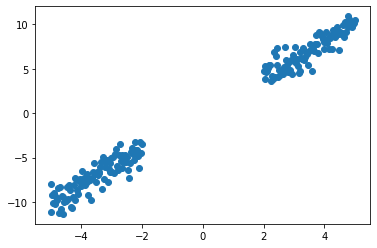

In [66]:
coef = 2 
x1 = np.linspace(-5,-2,100)
x1 = np.concatenate((x1,np.linspace(2,5,100)))
x2 =coef*x1+np.random.randn(200)
plt.scatter(x1,x2)

In [121]:
@njit
def GaussianKernel(x,y,sig2 = 1): 
    return np.exp(-1/(2*sig2)*LA.norm(x-y)**2)
@njit
def kern(x,y,sig2): 
    return np.exp(-1/2*LA.norm(x-y)**2)

@njit
def to_mat_K(X, Kernel, sig2 = 1): 
    length = X.shape[0]
    mat_K = np.zeros((length,length))
    for i in range(length):
        x_i = X[i,:]
        for j in range(i,length): 
            x_j = X[j,:]
            value = Kernel(x_i,x_j,sig2)
            mat_K[i,j] = value
            mat_K[j,i] = value 
    return mat_K   

def standardize(K): 
    U = np.full(K.shape,1/K.shape[0])
    I = np.eye(K.shape[0])
    return (I-U)@K@(I-U)


In [173]:
X = np.column_stack((x1,x2))
mat_K = to_mat_K(X,GaussianKernel)
mat_K = standardize(mat_K)

In [195]:
W,V = LA.eigh(mat_K)
print(W)
print(V)

[2.57462550e-15 3.50843157e-14 8.18333491e-14 2.12344114e-13
 5.59892883e-13 1.07353811e-12 2.19861273e-12 2.68749391e-12
 3.79162129e-12 4.89781018e-12 7.33428137e-12 8.13696526e-12
 8.27202585e-12 1.02764236e-11 1.68964207e-11 2.17229983e-11
 2.74453465e-11 2.78025955e-11 3.92416922e-11 3.95750609e-11
 8.15630755e-11 9.10440377e-11 9.66459157e-11 9.99356378e-11
 1.18183962e-10 1.90671870e-10 2.22897865e-10 2.38824983e-10
 3.41906484e-10 4.03633769e-10 4.47994782e-10 6.16885797e-10
 7.11596603e-10 8.23901796e-10 8.73782726e-10 9.49121074e-10
 1.41180703e-09 1.98069893e-09 2.20346633e-09 2.26263860e-09
 2.66042447e-09 2.71746780e-09 3.84068203e-09 4.32789259e-09
 4.81648241e-09 6.18806603e-09 8.05460176e-09 9.00367038e-09
 1.01236221e-08 1.24653079e-08 1.70013852e-08 1.83443466e-08
 1.93165043e-08 2.36277020e-08 2.48986375e-08 2.92345675e-08
 3.67164968e-08 3.84304838e-08 4.96259230e-08 6.65494715e-08
 8.23465685e-08 8.77815406e-08 1.01556299e-07 1.14198837e-07
 1.32018631e-07 1.332602

In [197]:
alpha_0 = V[:,-1]#/np.sqrt(W[0])
alpha_0

array([ 0.04734494,  0.00609241,  0.03270365,  0.01892488,  0.03714447,
        0.01669523,  0.03118316,  0.02426399,  0.05183507,  0.00610643,
        0.05489253,  0.01076746,  0.03407612,  0.0053861 ,  0.03337969,
        0.02262863,  0.02521902,  0.02398343,  0.06291475,  0.02842863,
        0.0694262 ,  0.05590041,  0.01342799,  0.01146972,  0.03640538,
        0.07507117,  0.0874232 ,  0.02699202,  0.08893438,  0.06032665,
        0.0447376 ,  0.09026374,  0.09392141,  0.07570938,  0.091161  ,
        0.08186655,  0.09794391,  0.08143204,  0.08998088,  0.10184587,
        0.09135898,  0.03743532,  0.10039906,  0.09690952,  0.02251328,
        0.10206108,  0.10541381,  0.08683468,  0.1075704 ,  0.08952262,
        0.10815721,  0.10721914,  0.10870131,  0.10878362,  0.10381269,
        0.09143937,  0.05216046,  0.072925  ,  0.09431308,  0.10571982,
        0.09373548,  0.08739524,  0.07980172,  0.10717639,  0.10635117,
        0.09672252,  0.08226877,  0.10434481,  0.07971284,  0.10

In [176]:
proj = mat_K@alpha_0
proj

array([ 0.16019259, -0.13813239,  0.37456891,  0.24381042,  0.38241902,
        0.19303417,  0.40617358,  0.35114231,  0.30764089, -0.13178   ,
        0.30735259,  0.02532505,  0.45422591, -0.1427718 ,  0.46284458,
        0.35142221,  0.39679264,  0.38120183,  0.34798165,  0.44621463,
        0.29834643,  0.44466015,  0.15336724,  0.09725579,  0.50992295,
        0.29890507,  0.01107098,  0.4486171 ,  0.07133098,  0.46117379,
        0.52177586,  0.12699878,  0.0319546 ,  0.35993138, -0.29855366,
        0.30644943,  0.0053171 ,  0.31849137,  0.21684444, -0.18526762,
        0.20482624,  0.49169513,  0.03546716,  0.12043541,  0.39051319,
        0.01033616, -0.3077136 , -0.33484956, -0.22318002,  0.21738045,
       -0.27661615, -0.14933218, -0.276577  , -0.24841201, -0.37623886,
       -0.3129323 ,  0.39776033, -0.16628087,  0.0811607 , -0.36575187,
       -0.29842737, -0.24395436,  0.20222641, -0.33841671, -0.26545563,
       -0.29609412, -0.18175791, -0.25783245, -0.15737953, -0.21

In [126]:
def f_0(x, mat_K):
    pass

In [127]:
@njit
def kern(x,y,sig2): 
    return np.exp(-1/2*LA.norm(x-y)**2)

In [191]:
import time 
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def stepwise_kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.
    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.
    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    
    sq_dists = pdist(X, 'sqeuclidean')
    
    
    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)
    
    # Computing the MxM kernel matrix.
    K = np.exp(-gamma * mat_sq_dists)
    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)
    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    #X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))
    X_pc = eigvecs[:,-1]
    return X_pc,eigvals

kpca,eigvals = stepwise_kpca(X,1/2,1)

In [185]:
eigvals
eigvals_sorted = np.zeros(eigvals.shape[0])
for i in range(eigvals.shape[0]): 
    eigvals_sorted[i]= eigvals[-i-1]

In [198]:
kpca-alpha_0

array([-4.64905892e-16,  0.00000000e+00, -8.88178420e-16, -7.77156117e-16,
       -7.21644966e-16, -5.34294831e-16, -6.80011603e-16, -6.97358837e-16,
       -7.49400542e-16, -1.91686944e-16, -7.07767178e-16, -3.69496100e-16,
       -7.35522754e-16, -1.67400815e-16, -7.77156117e-16, -7.04297731e-16,
       -7.07767178e-16, -6.86950496e-16, -7.49400542e-16, -7.35522754e-16,
       -7.07767178e-16, -7.35522754e-16, -4.26741975e-16, -3.64291930e-16,
       -7.63278329e-16, -6.93889390e-16, -4.85722573e-16, -7.11236625e-16,
       -4.85722573e-16, -7.07767178e-16, -7.00828284e-16, -5.13478149e-16,
       -4.44089210e-16, -6.66133815e-16,  1.38777878e-17, -6.66133815e-16,
       -4.02455846e-16, -6.66133815e-16, -5.41233725e-16, -1.94289029e-16,
       -4.85722573e-16, -6.52256027e-16, -4.30211422e-16, -4.44089210e-16,
       -5.75928194e-16, -3.33066907e-16,  8.32667268e-17,  4.71844785e-16,
       -4.16333634e-17, -4.99600361e-16,  5.55111512e-17, -1.38777878e-16,
        5.55111512e-17,  